# ** Self-Training Model Theory**


## Self-Training (Semi-Supervised Learning)

---

## Theory
Self-Training is a semi-supervised learning technique that leverages a small amount of labeled data and a large amount of unlabeled data to improve model performance. The algorithm iteratively trains a model on the labeled data, predicts labels for the unlabeled data, and adds the most confident predictions to the labeled dataset. It is widely used in scenarios where labeled data is scarce or expensive to obtain, such as text classification, image recognition, and speech processing.

The main idea is to:
- Train a model on the initial labeled dataset.
- Predict labels for the unlabeled data.
- Add the most confident predictions to the labeled dataset.
- Repeat the process until convergence or a stopping criterion is met.

---

## Mathematical Foundation
- **Model Training**:
  Train a model \( f \) on the labeled dataset \( L = \{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\} \):
  $$ f = \arg\min_f \sum_{(x_i, y_i) \in L} \mathcal{L}(f(x_i), y_i) $$
  - \( \mathcal{L} \): Loss function (e.g., cross-entropy for classification).

- **Label Prediction**:
  Use the trained model \( f \) to predict labels for the unlabeled dataset \( U = \{x_{n+1}, x_{n+2}, ..., x_{n+m}\} \):
  $$ \hat{y}_i = f(x_i) \quad \text{for} \quad x_i \in U $$

- **Confidence Thresholding**:
  Select the most confident predictions based on a threshold \( \tau \):
  $$ \text{Confidence}(x_i) = \max_{y} P(y | x_i) $$
  - \( P(y | x_i) \): Predicted probability for class \( y \).

- **Dataset Update**:
  Add the most confident predictions to the labeled dataset:
  $$ L \leftarrow L \cup \{(x_i, \hat{y}_i) \mid \text{Confidence}(x_i) > \tau\} $$

---

## Algorithm Steps
1. **Initialization**:
   - Start with a small labeled dataset \( L \) and a large unlabeled dataset \( U \).

2. **Model Training**:
   - Train a model \( f \) on the labeled dataset \( L \).

3. **Label Prediction**:
   - Use the model \( f \) to predict labels for the unlabeled dataset \( U \).

4. **Confidence Thresholding**:
   - Select the most confident predictions based on a threshold \( \tau \).

5. **Dataset Update**:
   - Add the most confident predictions to the labeled dataset \( L \).

6. **Repeat**:
   - Repeat the process until convergence or a stopping criterion is met.

---

## Key Parameters
- **base_estimator**: The base model used for training (e.g., logistic regression, decision tree).
- **threshold**: The confidence threshold for adding predictions to the labeled dataset.
- **max_iter**: The maximum number of iterations.

---

## Advantages
- Leverages unlabeled data to improve model performance.
- Reduces the need for large amounts of labeled data.
- Flexible with different base models.
- Easy to implement and integrate into existing workflows.

---

## Disadvantages
- Sensitive to the quality of the initial labeled data.
- May propagate errors if the model makes incorrect predictions.
- Requires careful tuning of the confidence threshold.
- Struggles with noisy or ambiguous data.

---

## Implementation Tips
- Use a **well-calibrated model** to ensure reliable confidence scores.
- Start with a **diverse and representative labeled dataset** to avoid bias.
- Use **cross-validation** to evaluate model performance during self-training.
- Consider **active learning** to select the most informative samples for labeling.

---

## Applications
- Text classification (e.g., sentiment analysis, spam detection)
- Image recognition (e.g., medical imaging, object detection)
- Speech processing (e.g., speech recognition, speaker identification)
- Bioinformatics (e.g., gene expression analysis)
- Anomaly detection

Self-Training is a powerful and flexible technique for semi-supervised learning. While it requires careful tuning and monitoring, it is a valuable tool for many real-world applications where labeled data is limited.

## **Model Evaluation for Self-Training**

### 1. Accuracy

**Formula:**
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

**Description:**
- Measures the overall correctness of the model’s predictions.
- Compares the number of correct predictions to the total predictions.

**Interpretation:**
- Higher accuracy indicates better performance.
- Can be misleading if the dataset is imbalanced.

---

### 2. Precision

**Formula:**
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

**Description:**
- Measures the proportion of correctly predicted positive samples out of all predicted positives.
- Helps assess how many of the newly labeled pseudo-labels are correct.

**Interpretation:**
- High precision means fewer false positives.
- Important when false positives are costly.

---

### 3. Recall (Sensitivity)

**Formula:**
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**Description:**
- Measures how many actual positives were correctly identified.
- Important when missing positive samples is costly.

**Interpretation:**
- High recall means fewer false negatives.
- Important for detecting rare events.

---

### 4. F1-Score

**Formula:**
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**Description:**
- A balance between precision and recall.
- Useful for imbalanced datasets.

**Interpretation:**
- Higher F1-score indicates a good balance.
- Useful when both false positives and false negatives are costly.

---

### 5. Confusion Matrix

**Description:**
- A table that summarizes true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).

**Interpretation:**
- Helps visualize classification errors.
- Important to analyze the self-labeled samples.

---

### 6. AUC-ROC Curve

**Description:**
- Plots True Positive Rate (TPR) vs. False Positive Rate (FPR).
- AUC (Area Under Curve) measures model performance.

**Interpretation:**
- **AUC = 1** → Perfect model.
- **AUC > 0.8** → Strong model.
- **AUC = 0.5** → Random guessing.

---

### 7. Labeling Accuracy (Pseudo-Label Quality)

**Formula:**
$$
\text{Labeling Accuracy} = \frac{\text{Correctly Pseudo-Labeled Samples}}{\text{Total Pseudo-Labeled Samples}}
$$

**Description:**
- Measures how accurately the model labels unlabeled data.

**Interpretation:**
- Higher accuracy means better self-training.
- Poor labeling can degrade model performance.

---

### 8. Number of Iterations Until Convergence

**Description:**
- Self-training involves multiple iterations.
- The number of iterations before performance stabilizes is an important metric.

**Interpretation:**
- Too many iterations may indicate overfitting.
- Faster convergence is desirable.

---

### 9. k-Fold Cross Validation

**Description:**
- Splits the dataset into \( k \) subsets for training and validation.
- Helps assess generalization.

**Interpretation:**
- Reduces overfitting risk.
- Provides a more reliable performance estimate.

---


## Self-Training

### class sklearn.semi_supervised.SelfTrainingClassifier(base_estimator, threshold=0.75, criterion='threshold', k_best=10, max_iter=10, verbose=False)

| **Parameter**   | **Description**                                                                 |
|---------------|-------------------------------------------------------------------------------|
| base_estimator | The supervised classifier to be trained in a semi-supervised manner.       |
| threshold     | Minimum confidence required to label an unlabeled sample.                   |
| criterion     | Strategy to select pseudo-labeled samples: `'threshold'` or `'k_best'`.     |
| k_best        | Number of most confident samples to label when using `'k_best'` criterion. |
| max_iter      | Maximum self-training iterations.                                           |
| verbose       | Whether to print training progress.                                         |

-

| **Attribute**           | **Description**                                                                 |
|-------------------------|-------------------------------------------------------------------------------|
| classes_               | The class labels known to the classifier.                                    |
| transduction_          | Labels assigned to the unlabeled samples.                                   |
| labeled_iter_          | Number of self-training iterations.                                         |

-

| **Method**             | **Description**                                                                 |
|------------------------|-------------------------------------------------------------------------------|
| fit(X, y)             | Fit the self-training classifier using labeled and unlabeled data.           |
| predict(X)            | Predict labels for input data `X`.                                           |
| predict_proba(X)      | Predict class probabilities for `X`.                                         |

-

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.SelfTrainingClassifier.html)


# Self-Learning  - Example

## Data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier

# Data Loading
data = load_iris()
X = data.data
y = data.target

# Use only a small portion of labeled data (semi-supervised setting)
num_labeled = int(0.1 * len(y))  # 10% labeled data

labels = np.full(y.shape, -1)  # Mark all labels as unknown (-1)
indices = np.random.choice(len(y), num_labeled, replace=False)
labels[indices] = y[indices]  # Assign labels to selected samples



##  Data processing

In [2]:

# Data Processing
df = pd.DataFrame(X, columns=data.feature_names)
print("First few rows of the dataset:")
print(df.head())

print("\nChecking for missing values:")
print(df.isnull().sum())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Checking for missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


## Model definition


Confusion Matrix:
[[50  0  0]
 [ 0 45  5]
 [ 0  3 47]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.90      0.92        50
           2       0.90      0.94      0.92        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



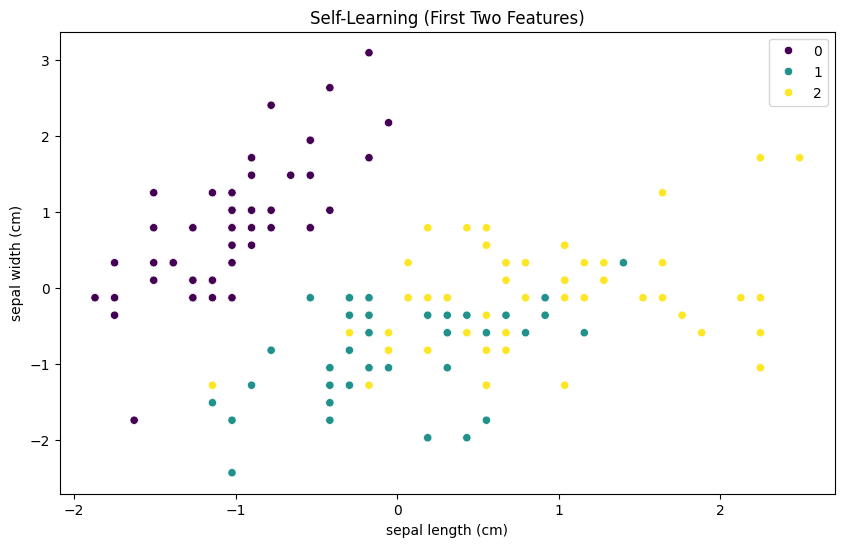

In [3]:

# Model Definition
base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
self_learning_model = SelfTrainingClassifier(base_classifier)

# Model Training
self_learning_model.fit(X_scaled, labels)

# Model Evaluation
y_pred = self_learning_model.predict(X_scaled)

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nClassification Report:")
print(classification_report(y, y_pred))

# Data Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_pred, palette='viridis')
plt.title('Self-Learning (First Two Features)')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

## Model evaulation